# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing


## Load dataset

In [2]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

/Users/cgkr/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Multivariate DNN Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    df[df['target']<500000].drop(['target'], axis=1).values,
    df[df['target']<500000]['target'],
    test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.2)

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/100
 - 1s - loss: 46421834587.6583 - mean_absolute_percentage_error: 99.9653 - val_loss: 46429564802.9313 - val_mean_absolute_percentage_error: 99.8965
Epoch 2/100
 - 0s - loss: 46259968135.8384 - mean_absolute_percentage_error: 99.7196 - val_loss: 46143811219.2163 - val_mean_absolute_percentage_error: 99.4708
Epoch 3/100
 - 0s - loss: 45796146348.4855 - mean_absolute_percentage_error: 99.0373 - val_loss: 45476260679.0025 - val_mean_absolute_percentage_error: 98.5024
Epoch 4/100
 - 1s - loss: 44878535068.0757 - mean_absolute_percentage_error: 97.7066 - val_loss: 44279404424.1425 - val_mean_absolute_percentage_error: 96.7769
Epoch 5/100
 - 1s - loss: 43352042465.2165 - mean_absolute_percentage_error: 95.4973 - val_loss: 42415638064.2036 - val_mean_absolute_percentage_error: 94.0702
Epoch 6/100
 - 1s - loss: 41117666202.8541 - mean_absolute_percentage_error: 92.2311 - val_loss: 39815229408.7328 - val_mean_absolute_percentage_error:

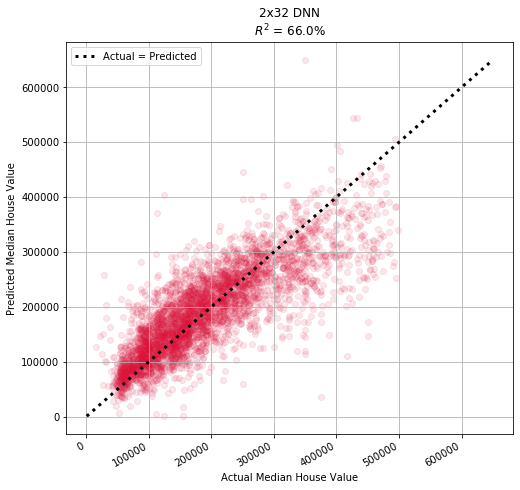

In [12]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('2x32 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.grid()
plt.legend()

fig.autofmt_xdate()
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 1s - loss: 46392516813.8750 - mean_absolute_percentage_error: 99.9140 - val_loss: 46137463075.8270 - val_mean_absolute_percentage_error: 99.4166
Epoch 2/2000
 - 0s - loss: 42610481755.9434 - mean_absolute_percentage_error: 93.6428 - val_loss: 33969494146.2799 - val_mean_absolute_percentage_error: 79.2313
Epoch 3/2000
 - 0s - loss: 18552982357.2655 - mean_absolute_percentage_error: 51.4132 - val_loss: 7232454504.8753 - val_mean_absolute_percentage_error: 37.4769
Epoch 4/2000
 - 0s - loss: 6690782399.6234 - mean_absolute_percentage_error: 38.4174 - val_loss: 6099606806.7990 - val_mean_absolute_percentage_error: 37.3528
Epoch 5/2000
 - 0s - loss: 5940490666.8160 - mean_absolute_percentage_error: 36.4033 - val_loss: 5624702179.9898 - val_mean_absolute_percentage_error: 34.9401
Epoch 6/2000
 - 0s - loss: 5483823669.4233 - mean_absolute_percentage_error: 34.3700 - val_loss: 5252577019.4402 - val_mean_absolute_percentage_error: 

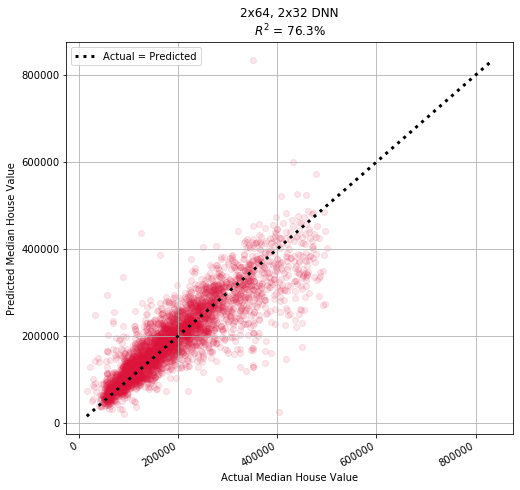

In [14]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('2x64, 2x32 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.grid()
plt.legend()

fig.autofmt_xdate()
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(24, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))

model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)



Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 1s - loss: 28406504078.9235 - mean_absolute_percentage_error: 69.8421 - val_loss: 6814727102.8601 - val_mean_absolute_percentage_error: 42.6716
Epoch 2/2000
 - 0s - loss: 6341380823.4032 - mean_absolute_percentage_error: 35.7733 - val_loss: 5242664231.7354 - val_mean_absolute_percentage_error: 31.9719
Epoch 3/2000
 - 0s - loss: 5194601658.1670 - mean_absolute_percentage_error: 32.7326 - val_loss: 4444129101.5165 - val_mean_absolute_percentage_error: 30.2561
Epoch 4/2000
 - 0s - loss: 4490564873.1618 - mean_absolute_percentage_error: 30.4421 - val_loss: 3910576914.8906 - val_mean_absolute_percentage_error: 27.3578
Epoch 5/2000
 - 0s - loss: 3993109147.7092 - mean_absolute_percentage_error: 28.2338 - val_loss: 3668836684.8651 - val_mean_absolute_percentage_error: 25.0090
Epoch 6/2000
 - 0s - loss: 3784387413.7134 - mean_absolute_percentage_error: 26.9455 - val_loss: 3639840730.8702 - val_mean_absolute_percentage_error: 30.2

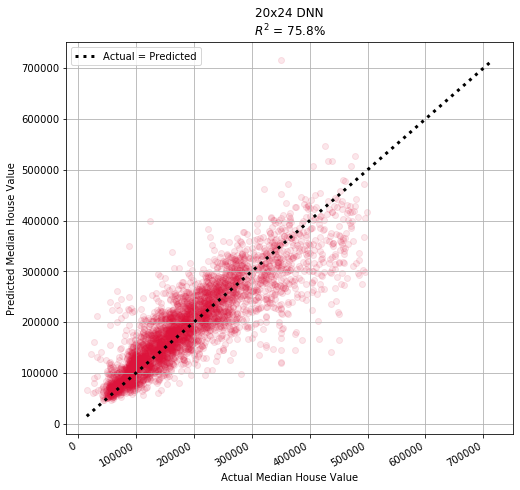

In [17]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('20x24 DNN\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.grid()
plt.legend()

fig.autofmt_xdate()
plt.show()